<a href="https://colab.research.google.com/github/dev02chandan/Signal-and-Image-Processing/blob/main/10_Morphological_Operations_Opening_and_Closing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aim: 
    Apply suitable sequence of morphological operations on the given noisy finger print test image to obtain noise free image.


### **Opening**
Morphological opening of an image is basically erosion followed by dilation

$A∘B=OPEN(A,B)=D(E(A))$

### **Closing**
Morphological opening of an image is basically dilation followed by erosion

$A∙B=CLOSE(A,B)=E(D(A))$


### Imports and Loading Image

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("Noisy_Fingerprint.tif",0)

Text(0.5, 1.0, 'Original Image')

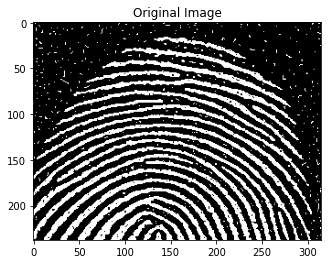

In [ ]:
plt.imshow(img, cmap="gray")
plt.title("Original Image")

In [ ]:
m,n = img.shape
print(m,n)

238 315


### Functions for Dilation and Erosion

In [ ]:
def Erosion(img):
    m,n = img.shape

    k = int(input("Enter the size of Structuring Element: "))
    constant = (k-1)//2

    SE = np.ones((k,k), dtype=np.uint8)

    new_img = np.zeros((m,n), dtype=np.uint8)

    for i in range(constant, m-constant):
        for j in range(constant, n-constant):
            temp = img[i-constant:i+constant+1, j-constant:j+constant+1]
            product = temp*SE
            new_img[i,j] = np.min(product)

    return new_img

In [ ]:
def Dilation(img):
    m,n = img.shape

    SED = np.array([[0,1,0], [1,1,1], [0,1,0]])
    constant = 1

    new_img =  np.zeros((m,n), dtype=np.uint8)

    for i in range(constant, m-constant):
        for j in range(constant, n-constant):
            temp = img[i-constant:i+constant+1 , j-constant:j+constant+1]
            product = temp*SED
            new_img[i,j] = np.max(product)

    return new_img

In [ ]:
def plotting(img, img1, img2, opening=True):
    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.imshow(img, cmap="gray")
    plt.title("Original Image")

    if(opening==True):
        plt.subplot(1,3,2)
        plt.imshow(img1, cmap='gray')
        plt.title("Eroded Image")

        plt.subplot(1,3,3)
        plt.imshow(img2, cmap='gray')
        plt.title("Opened Image")

    else:
        plt.subplot(1,3,2)
        plt.imshow(img1, cmap='gray')
        plt.title("Dilated Image")

        plt.subplot(1,3,3)
        plt.imshow(img2, cmap='gray')
        plt.title("Closed Image")

### Opening: 
Morphological opening of an image is basically erosion followed by dilation

$A∘B=OPEN(A,B)=D(E(A))$

Enter the size of Structuring Element: 3


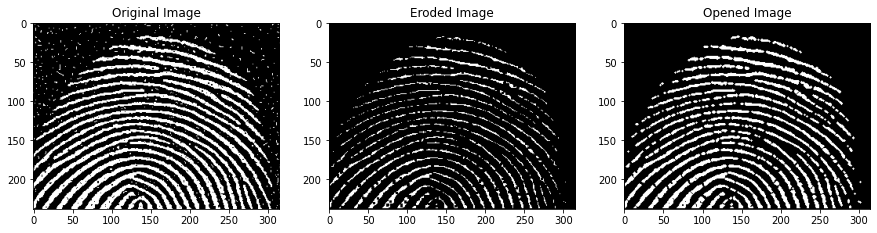

In [ ]:
img1 = Erosion(img)
img2 = Dilation(img1)
plotting(img, img1, img2)

### Closing: 
Morphological opening of an image is basically dilation followed by erosion

$A∙B=CLOSE(A,B)=E(D(A))$

Enter the size of Structuring Element: 3


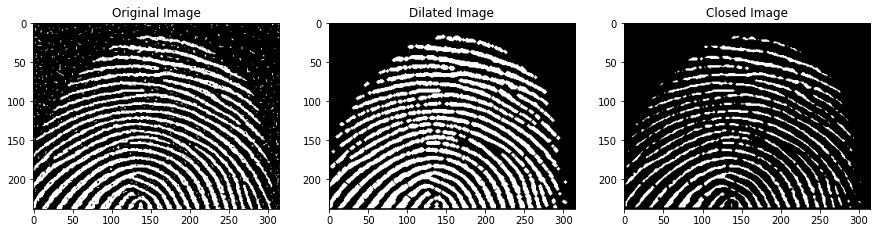

In [ ]:
img3 = Dilation(img2)
img4 = Erosion(img3)
plotting(img, img3, img4, opening=False)

Text(0.5, 1.0, 'Erosion - 2 (CLOSING)')

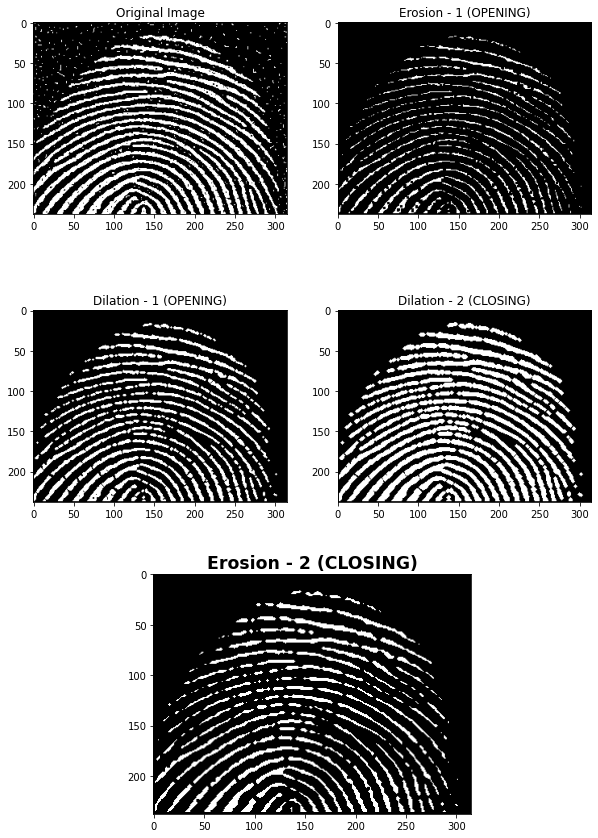

In [ ]:
# Plotting All Images
plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

plt.subplot(3,2,2)
plt.imshow(img1, cmap='gray')
plt.title("Erosion - 1 (OPENING)")

plt.subplot(3,2,3)
plt.imshow(img2, cmap='gray')
plt.title("Dilation - 1 (OPENING)")

plt.subplot(3,2,4)
plt.imshow(img3, cmap='gray')
plt.title("Dilation - 2 (CLOSING)")

plt.subplot(3,1,3)
plt.imshow(img4, cmap='gray')
plt.title("Erosion - 2 (CLOSING)",fontweight='bold', fontsize="xx-large")


### Conclusion: 
Hence in conclusion we can say that we have applied suitable Morphological Operations on the given image to obtain a noise free Fingerpring Image